In [1]:
from pandas_datareader import data
import matplotlib.pyplot as plt
import pandas as pd
import re
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import datetime as dt


from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
from sklearn.metrics import accuracy_score

In [2]:
file = open('stocks_name.txt','r')

Files = []

for line in file:
    line = re.sub('\n', '', line)
    line = line.split('\t')
    if line[1][2:4] == '.A':
        Files.append('csv/BT-A.L.csv')
    elif line[1][2] == '.':
        Files.append('csv/' + line[1] + 'L.csv')
    else:
        Files.append('csv/' + line[1] + '.L.csv')


<class 'pandas.core.frame.DataFrame'>
Index: 1264 entries, 2015-01-02 to 2020-01-03
Data columns (total 6 columns):
High         1264 non-null float64
Low          1264 non-null float64
Open         1264 non-null float64
Close        1264 non-null float64
Volume       1264 non-null float64
Adj Close    1264 non-null float64
dtypes: float64(6)
memory usage: 69.1+ KB


array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000023E04E5E348>,
      dtype=object)

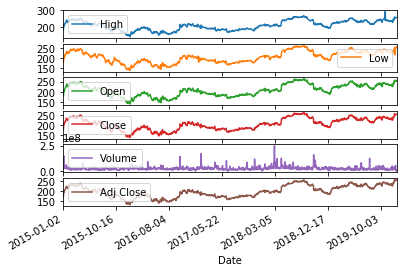

In [3]:
df = pd.read_csv('csv/TSCO.L.csv')
# Sort DataFrame by date
#df = df.sort_values('Date')

df.set_index('Date', inplace=True)
df.info()

df.plot(subplots=True)

In [6]:
df['pred'] = df.Close.shift(-1)

df = df.dropna()
df.describe()

values = df.values
values = values.astype('float32')


from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
scaled = scaler.fit_transform(values)
scaled = pd.DataFrame(scaled)
scaled.head()

,0,1,2,3,4,5,6
0,0.336156,0.386076,0.388054,0.384252,0.064704,0.367028,0.333858
1,0.333055,0.347912,0.385680,0.333858,0.114553,0.318893,0.311811
2,0.290554,0.319149,0.348892,0.311811,0.099167,0.297834,0.337008
3,0.292508,0.342711,0.332674,0.337008,0.116917,0.321901,0.551575
4,0.474919,0.409102,0.408623,0.551575,0.608425,0.526850,0.511024


In [53]:
def ts(new_data, look_back = 60, pred_col = 1):
    
    t = new_data.copy()
    t['id'] = range(1,len(t)+1)
    t = t.iloc[:-look_back, :]
    t.set_index('id', inplace = True)
    pred_value = new_data.copy()
    pred_value = pred_value.iloc[look_back:, pred_col]
    pred_value.columns = ['Pred']
    pred_value = pd.DataFrame(pred_value)
    
    pred_value['id'] = range(1, len(pred_value)+1)
    pred_value.set_index('id', inplace=True)
    final_df = pd.concat([t, pred_value], axis=1)
    
    return final_df

In [56]:

arr_df = ts(scaled,25,0)

arr_df.fillna(0, inplace=True)

arr_df.columns = ['v0(t-60)','v1(t-60)', 'v2(t-60)', 'v3(t-60)',
                  'v4(t-60)', 'v5(t-60)', 'v6(t-60)', 'v']

 #   df['%change1'] = df['Adj Close'].pct_change(periods=1)*100
  #  df['%change2'] = df['Adj Close'].pct_change(periods=2)*100

arr_df.head()

,v0(t-60),v1(t-60),v2(t-60),v3(t-60),v4(t-60),v5(t-60),v6(t-60),v
id,,,,,,,,
1,0.336156,0.386076,0.388054,0.384252,0.064704,0.367028,0.333858,0.607818
2,0.333055,0.347912,0.385680,0.333858,0.114553,0.318893,0.311811,0.609772
3,0.290554,0.319149,0.348892,0.311811,0.099167,0.297834,0.337008,0.664169
4,0.292508,0.342711,0.332674,0.337008,0.116917,0.321901,0.551575,0.667752
5,0.474919,0.409102,0.408623,0.551575,0.608425,0.526850,0.511024,0.692248


In [71]:
from sklearn.model_selection import train_test_split

x=np.array(arr_df.drop(['v'],1))
y=np.array(arr_df['v'])


x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)


print(x_train.shape)
print(y_train.shape)


(988, 7)
(988,)


In [69]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(x_train, y_train)
GAUSS = model.predict(X_test)


ValueError: Unknown label type: (array([0.03193492, 0.04685342, 0.04862547, 0.05244303, 0.05276877,
       0.05732906, 0.06071669, 0.06416947, 0.0657981 , 0.06938118,
       0.0700326 , 0.07081443, 0.07491857, 0.0781759 , 0.08252126,
       0.08557659, 0.08599359, 0.08631927, 0.08859938, 0.09800005,
       0.10716617, 0.10801303, 0.10814333, 0.10879493, 0.11172652,
       0.11368084, 0.1153096 , 0.11596096, 0.11758959, 0.11856687,
       0.11908793, 0.12566781, 0.13289905, 0.13355052, 0.13517916,
       0.13583064, 0.13615644, 0.1374594 , 0.13876224, 0.13908803,
       0.14037788, 0.14071667, 0.14104247, 0.14201963, 0.1452769 ,
       0.14625418, 0.14723134, 0.14918578, 0.14983714, 0.15016294,
       0.15048862, 0.15114021, 0.15244305, 0.15342021, 0.15732908,
       0.15798044, 0.15863192, 0.15895772, 0.15899682, 0.15928352,
       0.16091216, 0.16351795, 0.16612375, 0.16677535, 0.16807818,
       0.16840398, 0.16905546, 0.17329001, 0.1739415 , 0.17785025,
       0.17817593, 0.17947888, 0.17980456, 0.18143332, 0.18192184,
       0.18436491, 0.1846906 , 0.18957663, 0.18975246, 0.1902281 ,
       0.19055378, 0.1931597 , 0.19381106, 0.19511414, 0.19674277,
       0.19902289, 0.19941366, 0.20065153, 0.2009772 , 0.201303  ,
       0.2016288 , 0.20195436, 0.20260596, 0.20321178, 0.2042346 ,
       0.20456028, 0.20521176, 0.20618904, 0.20625412, 0.2071662 ,
       0.20846903, 0.20944631, 0.20958316, 0.21042347, 0.21107495,
       0.21124434, 0.21140075, 0.21149194, 0.2127037 , 0.2182411 ,
       0.21856678, 0.21889257, 0.22052121, 0.22117269, 0.22165477,
       0.22410429, 0.2263844 , 0.22671008, 0.22700334, 0.22736168,
       0.22801304, 0.22931612, 0.22990882, 0.23114014, 0.23175907,
       0.2335831 , 0.23387635, 0.23550498, 0.23583066, 0.23648214,
       0.2364887 , 0.23680782, 0.23856688, 0.24006522, 0.2407167 ,
       0.24104238, 0.24169385, 0.24332249, 0.24364829, 0.24560273,
       0.24566782, 0.2459284 , 0.24625409, 0.24657989, 0.24690557,
       0.24749196, 0.24788272, 0.24951148, 0.24983716, 0.25276875,
       0.25374603, 0.2540717 , 0.25635183, 0.25773942, 0.25830626,
       0.26058638, 0.26123786, 0.26188934, 0.26221502, 0.2625668 ,
       0.2628665 , 0.2629968 , 0.26344633, 0.26416945, 0.2657981 ,
       0.26644957, 0.26677537, 0.26710105, 0.26742673, 0.26775253,
       0.26905537, 0.26938117, 0.26944625, 0.2698697 , 0.27070367,
       0.27250814, 0.27263844, 0.2736156 , 0.27459288, 0.27502942,
       0.27619553, 0.2765473 , 0.27785027, 0.27869713, 0.27882743,
       0.2791531 , 0.2798047 , 0.28078187, 0.28110754, 0.2820847 ,
       0.28306198, 0.28338766, 0.28403914, 0.28436494, 0.2872964 ,
       0.287948  , 0.28827357, 0.28876877, 0.28892517, 0.28957665,
       0.28990233, 0.2905538 , 0.29153097, 0.29250824, 0.2934854 ,
       0.29381108, 0.29413688, 0.29446268, 0.29700983, 0.29726386,
       0.29739416, 0.29856682, 0.2986971 , 0.2990229 , 0.29967427,
       0.29986966, 0.30000007, 0.30032575, 0.30049515, 0.30097735,
       0.3022802 , 0.30293167, 0.30330944, 0.30351806, 0.30390882,
       0.30423462, 0.3045603 , 0.30553758, 0.3074267 , 0.30781758,
       0.30785024, 0.30814338, 0.30846906, 0.30912066, 0.30944622,
       0.309772  , 0.3100978 , 0.3104235 , 0.31172645, 0.31241047,
       0.3133551 , 0.3136809 , 0.31400657, 0.31433225, 0.31465805,
       0.31498373, 0.31530952, 0.31700325, 0.31726396, 0.31824112,
       0.31840396, 0.31852782, 0.3185668 , 0.31921828, 0.31998706,
       0.32013035, 0.32052124, 0.32073617, 0.3211727 , 0.3214984 ,
       0.32214987, 0.32312703, 0.32377863, 0.32443   , 0.3246907 ,
       0.32540727, 0.32599354, 0.3260262 , 0.32605863, 0.32638443,
       0.32671022, 0.3267753 , 0.32714665, 0.32765484, 0.32768738,
       0.32801306, 0.32866454, 0.32899022, 0.3290032 , 0.3299675 ,
       0.33153093, 0.33231926, 0.3328991 , 0.33381116, 0.33587623,
       0.33648217, 0.33778512, 0.3385538 , 0.33876228, 0.33941376,
       0.34039092, 0.3407166 , 0.34234536, 0.34267104, 0.343974  ,
       0.34495127, 0.34592843, 0.34659934, 0.3469056 , 0.34723127,
       0.34755707, 0.34853423, 0.3491857 , 0.34983718, 0.35048866,
       0.35114014, 0.3551792 , 0.35537457, 0.35602617, 0.35635185,
       0.35667753, 0.357329  , 0.3576548 , 0.3579805 , 0.35830617,
       0.35895765, 0.3605864 , 0.36156356, 0.36286652, 0.363518  ,
       0.3687297 , 0.37003255, 0.37068415, 0.37100983, 0.37168086,
       0.371987  , 0.3745929 , 0.37491858, 0.3755505 , 0.37687302,
       0.3775245 , 0.37785017, 0.37808478, 0.37850165, 0.37915313,
       0.3801303 , 0.3804561 , 0.38143325, 0.38175905, 0.3827362 ,
       0.3830619 , 0.38338768, 0.38501632, 0.38534212, 0.38599348,
       0.38729656, 0.38794792, 0.3889252 , 0.38957655, 0.38990235,
       0.39055383, 0.3912052 , 0.39348543, 0.3941368 , 0.3944626 ,
       0.39543986, 0.3967427 , 0.39739418, 0.39804566, 0.39869714,
       0.40195453, 0.4022801 , 0.40423453, 0.40716612, 0.4084692 ,
       0.41042352, 0.411075  , 0.41205215, 0.41237783, 0.41302943,
       0.4136808 , 0.41511405, 0.41726387, 0.41758966, 0.41824114,
       0.4192183 , 0.4195441 , 0.41986978, 0.42117274, 0.42149842,
       0.4221499 , 0.42247558, 0.42312717, 0.42325735, 0.42345273,
       0.42443   , 0.42540717, 0.42671013, 0.4270358 , 0.4273616 ,
       0.4276874 , 0.4280131 , 0.42866457, 0.4299674 , 0.43061888,
       0.4319154 , 0.43192184, 0.4328339 , 0.43289912, 0.4332248 ,
       0.43387628, 0.43485343, 0.43517923, 0.4358307 , 0.43713355,
       0.43778515, 0.4381107 , 0.4384365 , 0.439088  , 0.43973947,
       0.44104242, 0.4413681 , 0.44169378, 0.44234538, 0.44299674,
       0.44364822, 0.44429982, 0.44495118, 0.44527698, 0.44625413,
       0.4465798 , 0.4476092 , 0.4498502 , 0.4501629 , 0.45081437,
       0.45244312, 0.45443654, 0.45472312, 0.45537472, 0.45602608,
       0.45614338, 0.45691204, 0.45700336, 0.45732903, 0.4579805 ,
       0.45841694, 0.458632  , 0.45993495, 0.46039093, 0.4638437 ,
       0.46416938, 0.46514666, 0.46611083, 0.466645  , 0.4667753 ,
       0.46775246, 0.4690554 , 0.4697069 , 0.47034538, 0.47035837,
       0.47100985, 0.47166133, 0.4726385 , 0.47296417, 0.47328997,
       0.47361577, 0.47394133, 0.4748013 , 0.4749186 , 0.47611725,
       0.47622156, 0.47654724, 0.47719872, 0.4773941 , 0.4775244 ,
       0.47832572, 0.47947884, 0.48143327, 0.48273623, 0.48403907,
       0.48469067, 0.48534203, 0.48566782, 0.4859935 , 0.48664498,
       0.48729646, 0.48762214, 0.48794794, 0.48827374, 0.4885993 ,
       0.4889251 , 0.4892509 , 0.48981106, 0.48990238, 0.49030626,
       0.49055374, 0.49120533, 0.49144638, 0.491531  , 0.49348533,
       0.4941368 , 0.4944626 , 0.49576557, 0.49641705, 0.4970684 ,
       0.49771988, 0.49837136, 0.49902284, 0.49967432, 0.5009773 ,
       0.50162864, 0.50195444, 0.50228024, 0.5029317 , 0.50338125,
       0.50423455, 0.50488603, 0.5055375 , 0.506189  , 0.50749195,
       0.5087948 , 0.51042354, 0.51237786, 0.51270366, 0.51302934,
       0.513355  , 0.51349187, 0.5136808 , 0.5140066 , 0.5166124 ,
       0.5172639 , 0.51770043, 0.51791537, 0.5200391 , 0.5205213 ,
       0.5212965 , 0.5214137 , 0.5218241 , 0.5218371 , 0.5224756 ,
       0.52259946, 0.5230684 , 0.523075  , 0.5250815 , 0.5254072 ,
       0.525733  , 0.5260587 , 0.52931595, 0.5309446 , 0.53192186,
       0.5332248 , 0.5338763 , 0.53485346, 0.5361564 , 0.5368079 ,
       0.53745925, 0.53843653, 0.53876233, 0.54071665, 0.5413681 ,
       0.5472313 , 0.5485343 , 0.54918563, 0.5501629 , 0.55114007,
       0.55179167, 0.552443  , 0.5530945 , 0.553746  , 0.55504894,
       0.5557003 , 0.5563519 , 0.55700326, 0.5589577 , 0.56058633,
       0.56091213, 0.5615636 , 0.56286657, 0.5645212 , 0.56612384,
       0.5680783 , 0.56827366, 0.5693811 , 0.5700326 , 0.5713941 ,
       0.57198703, 0.5729643 , 0.5746645 , 0.5752443 , 0.5758958 ,
       0.5763062 , 0.57654727, 0.5778502 , 0.580456  , 0.58094466,
       0.5811076 , 0.58306193, 0.5837134 , 0.5843649 , 0.58501625,
       0.58534205, 0.58566785, 0.5859935 , 0.5863192 , 0.5869707 ,
       0.5876223 , 0.58827364, 0.5889251 , 0.5915309 , 0.59348536,
       0.59413683, 0.5973942 , 0.5980456 , 0.5995766 , 0.6       ,
       0.6006515 , 0.60195446, 0.603088  , 0.6039089 , 0.60521173,
       0.6071662 , 0.6084691 , 0.6091205 , 0.61042356, 0.6123779 ,
       0.61302936, 0.61368084, 0.6143323 , 0.61693823, 0.6175896 ,
       0.6182411 , 0.61889255, 0.619544  , 0.62182415, 0.62410426,
       0.62475574, 0.6254072 , 0.6267102 , 0.62736154, 0.62750494,
       0.62801313, 0.6286645 , 0.6290685 , 0.629316  , 0.62996745,
       0.63061893, 0.6312704 , 0.6345278 , 0.63517916, 0.6364821 ,
       0.6371336 , 0.6377851 , 0.63843644, 0.6389512 , 0.6396482 ,
       0.6397395 , 0.6403909 , 0.64104235, 0.6413356 , 0.6420195 ,
       0.6423453 , 0.6429968 , 0.6449511 , 0.6452769 , 0.6456027 ,
       0.64690554, 0.6482085 , 0.64886   , 0.64951146, 0.6508144 ,
       0.65211725, 0.6540717 , 0.65504885, 0.65537465, 0.6560261 ,
       0.6573291 , 0.65798044, 0.6592835 , 0.66058636, 0.66123784,
       0.6618893 , 0.6627102 , 0.66351795, 0.6647557 , 0.6651466 ,
       0.66579807, 0.66644955, 0.667101  , 0.6680782 , 0.668404  ,
       0.66905546, 0.6697068 , 0.67076886, 0.67166126, 0.6736157 ,
       0.67426705, 0.67491865, 0.67524433, 0.67557013, 0.67614985,
       0.6762215 , 0.67687297, 0.6789577 , 0.6794789 , 0.6807817 ,
       0.681759  , 0.6823453 , 0.6840391 , 0.6845603 , 0.6846906 ,
       0.6853421 , 0.68631923, 0.6872964 , 0.6892508 , 0.69120526,
       0.69185674, 0.6921824 , 0.6925082 , 0.6934854 , 0.69381106,
       0.69511414, 0.6958698 , 0.6958958 , 0.696417  , 0.69706845,
       0.69771993, 0.69902277, 0.69955707, 0.7009772 , 0.7016287 ,
       0.70228016, 0.70293164, 0.7042346 , 0.70553744, 0.7068404 ,
       0.7074919 , 0.70814335, 0.7100977 , 0.7117264 , 0.7127036 ,
       0.714658  , 0.7153095 , 0.715961  , 0.71726394, 0.7205212 ,
       0.72247565, 0.723127  , 0.7237785 , 0.7273617 , 0.72833884,
       0.73029315, 0.73094475, 0.7322476 , 0.73366785, 0.7407167 ,
       0.7408469 , 0.7433225 , 0.743974  , 0.7452769 , 0.7576548 ,
       0.75830615, 0.7589576 , 0.7615634 , 0.7633226 , 0.763518  ,
       0.76742685, 0.7687297 , 0.76938117, 0.77003264, 0.7713355 ,
       0.77263844, 0.7732899 , 0.7739415 , 0.77524436, 0.7771988 ,
       0.77850163, 0.7791531 , 0.7798046 , 0.7811074 , 0.783062  ,
       0.7843648 , 0.7850163 , 0.7856678 , 0.78631926, 0.78697085,
       0.7876221 , 0.7882736 , 0.78957665, 0.7908795 , 0.7960913 ,
       0.79739404, 0.7986971 , 0.7993486 , 0.80846906, 0.8123779 ,
       0.8195441 , 0.8228015 , 0.8267101 ], dtype=float32),)